In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'DejaVu Sans', 'serif': ['Computer Modern'], 'size':15})
rc('figure', facecolor='w')
import astropy.io.fits as fits
from astropy.io import ascii
import math, os
from operator import itemgetter
from itertools import groupby

#optional dependencies
from distutils.spawn import find_executable

if find_executable('latex'): rc('text', usetex=True)
else: rc('text', usetex=False)
    
try: from natsort import natsorted
except: pass

In [107]:
def read_data(fname):
    data = ascii.read(fname)
    return [np.array(data['col1']), np.array(data['col2'])]

In [169]:
def linear_regression(x, y):
    
    A = np.array([[np.sum(x**2), np.sum(x)], \
                  [np.sum(x), len(x)]])
    a = np.array([np.sum(x*y), np.sum(y)])

    return np.dot(np.linalg.inv(A), a)

In [124]:
def emission(data, **kwargs):
    thres = kwargs.get('thres', 1)
    
    x, y = np.array(data[0]), np.array(data[1])
    Npix = len(x)
    
    med = np.median(y)
    std = np.std(y)
    cut = med + thres*std
    
    count_cut = []
    for i in range(Npix):
        if y[i] >= cut:
            count_cut.append(i)
    
    emission = []
    arr = []
    for i in range(len(count_cut)-1):
        if (count_cut[i+1] - count_cut[i]) == 1:
            arr.append(count_cut[i])
        else:
            arr.append(count_cut[i])
            if len(arr) > 5:
                emission.append(np.array(arr))
            arr = []
            
    plt.figure(figsize=[16,5])
    plt.step(x, y, color='k')
    plt.axhline(cut, color='r', label=r'$\tilde{x} + %s \sigma$'%(thres))
    plt.axhline(med, color='b', label=r'$\tilde{x}$')
    
    plt.xlabel('Pixel')
    plt.ylabel('Count (ADU)')
    plt.xlim(min(x), max(x))
    if 'ylim' in kwargs:
        plt.ylim(kwargs.get('ylim'))
    if 'title' in kwargs:
        plt.title(kwargs.get('title'), fontsize=20)
    plt.legend(loc='upper right')
    plt.show()
    
    return np.array(emission)

In [128]:
def centroid(data, feat_idx, **kwargs):
    
    x, y = np.array(data[0]), np.array(data[1])
    Npix = len(x)
    
    max_idx = []
    for feat in feat_idx:
        for idx in feat:
            if y[idx] == max(y[feat]):
                max_idx.append(idx)
                
    plt.figure(figsize=[16,5])
    plt.plot(x, y, color='k')
    for idx in max_idx:
        plt.axvline(x[idx], color='g')
#     plt.axhline(cut, color='r', label=r'$\tilde{x} + %s \sigma$'%(thres))
#     plt.axhline(med, color='b', label=r'$\tilde{x}$')
    
    plt.xlabel('Pixel')
    plt.ylabel('Count (ADU)')
    if 'xlim' in kwargs:
        plt.xlim(kwargs.get('xlim'))
    else:
        plt.xlim(min(x), max(x))
    if 'ylim' in kwargs:
        plt.ylim(kwargs.get('ylim'))
    if 'title' in kwargs:
        plt.title(kwargs.get('title'), fontsize=20)
#     plt.legend(loc='upper right')
    plt.show()
                
    return np.array(max_idx)

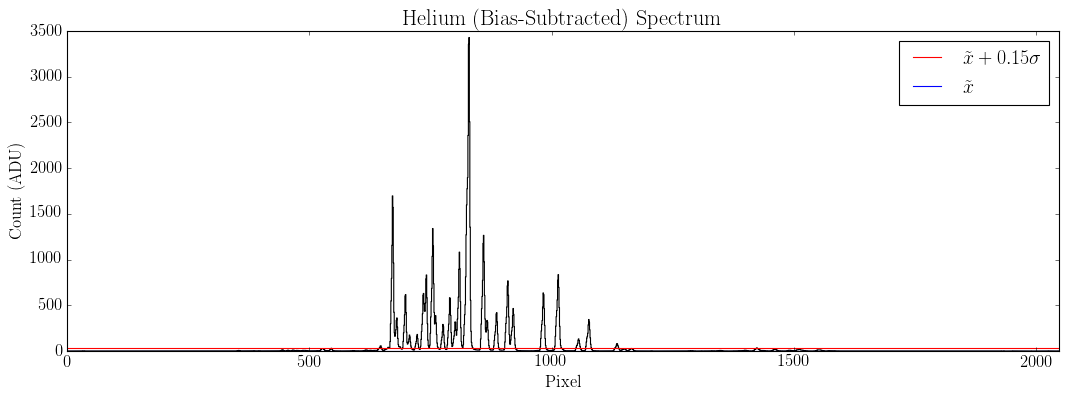

In [161]:
data = read_data('/home/jess/Desktop/Academic/PHYS164/lab2/bias_subtracted/neonbs.txt')
emiss = emission(data, thres=.15, ylim=[0,3500], title='Helium (Bias-Subtracted) Spectrum')

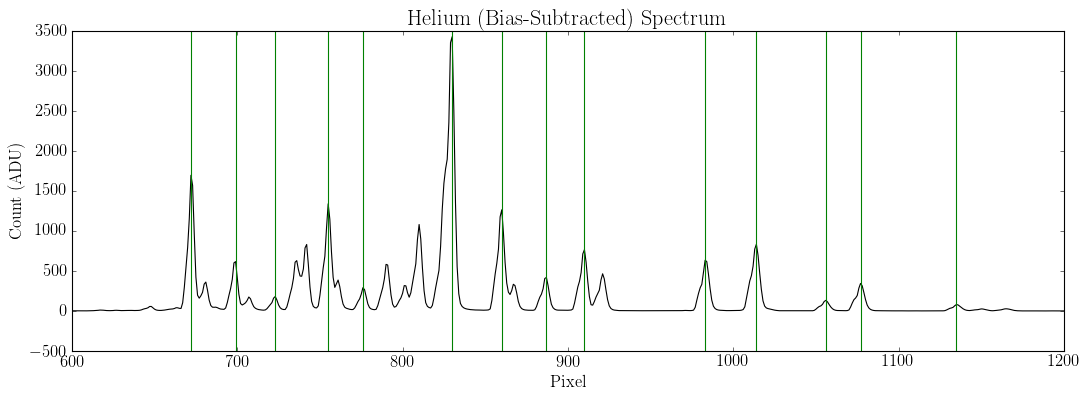

In [164]:
cent = centroid(data, emiss, xlim=[600,1200], title='Helium (Bias-Subtracted) Spectrum')

In [152]:
for c in cent:
    print(data[1][c])

1696.45
617.3800000000001
181.31
1339.68
290.88
3428.72
1265.04
419.2800000000001
767.24
635.1800000000001
834.96
132.67000000000002
344.49
80.85999999999999


In [176]:
he_cal = pd.read_csv('wavecal/helium.csv')

xcal = he_cal['spec_pixel']
ycal = he_cal['nist_wave']

[m,c] = linear_regression(xcal, ycal)
print(m, c)

0.3572833263098749 343.49360865290055


No handles with labels found to put in legend.


<Figure size 640x640 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x640 with 0 Axes>

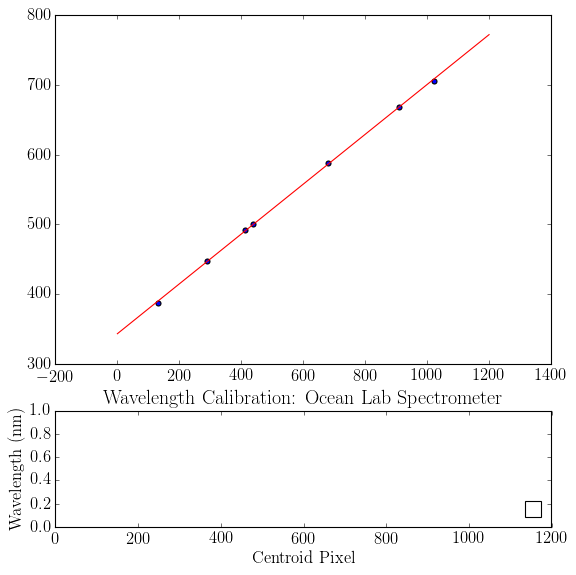

In [207]:
xfit = np.arange(0,1200)
yfit = m*xfit + c

fig = plt.figure(figsize=[8,8])
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])

# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# ax2.set_aspect(aspect=1)

ax1.scatter(xcal, ycal, label='Helium Emission Centroids')
ax1.plot(xfit, yfit, color='r', label='$y=%s x + %s$'%(np.round(m,4), np.round(c,2)))

plt.xlim(xfit[0], xfit[-1])
plt.xlabel('Centroid Pixel')
plt.ylabel('Wavelength (nm)')
plt.title('Wavelength Calibration: Ocean Lab Spectrometer')
plt.legend(loc='lower right', scatterpoints=1)
plt.show()

In [119]:
def emission(data, **kwargs):
    thres = kwargs.get('thres', 1)
    
    x, y = np.array(data[0]), np.array(data[1])
    Npix = len(x)
    
    med = np.median(y)
    std = np.std(y)
    cut = med + thres*std
    
    #Get all pixels which lie above given threshold
    count_cut = []
    for i in range(Npix):
        if y[i] >= cut:
            count_cut.append(i)
   
    #Group individual emission features into separate arrays
    emission = []
    arr = []
    for i in range(len(count_cut)-1):
        if (count_cut[i+1] - count_cut[i]) == 1:
            arr.append(count_cut[i])
        else:
            arr.append(count_cut[i])
            if len(arr) > 5:
                emission.append(np.array(arr))
            arr = []
    
    return np.array(emission)

emission(data, thres=.05)

array([array([130, 131, 132, 133, 134, 135, 136]),
       array([286, 287, 288, 289, 290, 291, 292, 293]),
       array([352, 353, 354, 355, 356, 357, 358]),
       array([409, 410, 411, 412, 413, 414, 415, 416]),
       array([434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446,
       447, 448, 449]),
       array([663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675,
       676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688,
       689]),
       array([903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915,
       916]),
       array([1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025,
       1026, 1027, 1028, 1029, 1030, 1031]),
       array([1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091,
       1092])], dtype=object)

In [120]:
def centroid(data, feat_idx, **kwargs):
    
    x, y = np.array(data[0]), np.array(data[1])
    Npix = len(x)
    
    max_idx = []
    for feat in feat_idx:
        for idx in feat:
            if y[idx] == max(y[feat]):
                max_idx.append(idx)
                
    return np.array(max_idx)

centroid(data, emiss)

array([ 132,  289,  355,  412,  438,  678,  908, 1021, 1086])

In [168]:
linear_regression(data[0], data[1])

array([-2.64948535e-02,  7.61202218e+01])